In [50]:
import os
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [51]:

images_train = []
labels_train = []
for filename in os.listdir('training/Angry'):
    input_image = cv2.imread('training/Angry/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([1, 0, 0, 0])
for filename in os.listdir('training/Happy'):
    input_image = cv2.imread('training/Happy/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 1, 0, 0])
for filename in os.listdir('training/Neutral'):
    input_image = cv2.imread('training/Neutral/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 0, 1, 0])
for filename in os.listdir('training/Sad'):
    input_image = cv2.imread('training/Sad/' + filename)
    if input_image is not None:
        gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        imgdata = np.array(gray)
        images_train.append(imgdata)
        labels_train.append([0, 0, 0, 1])
print(labels_train)

[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0

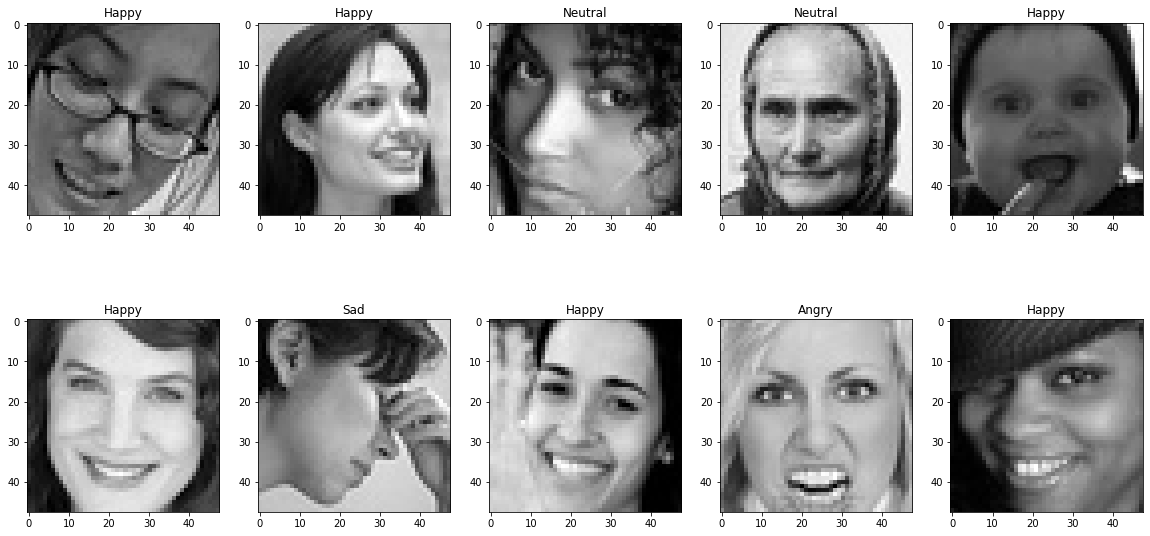

In [52]:
fig=plt.figure(figsize=(20,20))

nrows = 2
ncols = 5
happy = 0
neutral = 0
angry = 0
sad = 0

for i in range (1, nrows*ncols+1):
    index = np.random.randint(0, len(images_train))
    img = images_train[index]
    if labels_train[index][0] == 1:
        title = 'Angry'
        angry += 1
    elif labels_train[index][1] == 1:
        title = 'Happy'
        happy += 1
    elif labels_train[index][2] == 1:
        title = 'Neutral'
        neutral += 1
    elif labels_train[index][3] == 1:
        title = 'Sad'
        sad += 1

    if i < 6:
        fig.add_subplot(1,ncols,i)
    else:
        fig.add_subplot(2,ncols,i)
    plt.imshow(img, cmap='gray')
    plt.title(title)

plt.show()

In [53]:
print('Angry: ' + str(angry))
print('Happy: ' + str(happy))
print('Neutral: ' + str(neutral))
print('Sad: ' + str(sad))

Angry: 1
Happy: 6
Neutral: 2
Sad: 1


In [54]:

x_train, x_validation, y_train, y_validation = train_test_split(images_train, labels_train, test_size=0.1, random_state=1)

print(y_train)

x_train = np.asarray(x_train)
x_train = np.expand_dims(x_train, axis=0)
x_train = x_train.reshape(x_train.shape[1], x_train.shape[2], x_train.shape[3], x_train.shape[0])
y_train = np.asarray(y_train)

x_validation = np.asarray(x_validation)
x_validation = np.expand_dims(x_validation, axis=0)
x_validation = x_validation.reshape(x_validation.shape[1], x_validation.shape[2], x_validation.shape[3], x_validation.shape[0])
y_validation = np.asarray(y_validation)

[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1

In [55]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 48)        480       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 48)       192       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 48, 48, 48)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 48)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 48)        0         
                                                                 
 flatten_5 (Flatten)         (None, 6912)             

In [56]:
%%time
epochs = 25
history = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    validation_data = (x_validation, y_validation)
)

Epoch 1/25
591/591 [==============================] - 56s 94ms/step - loss: 1.2921 - accuracy: 0.4491 - val_loss: 1.0861 - val_accuracy: 0.5288
Epoch 2/25
591/591 [==============================] - 56s 94ms/step - loss: 1.1005 - accuracy: 0.5307 - val_loss: 1.0703 - val_accuracy: 0.5383
Epoch 3/25
591/591 [==============================] - 59s 99ms/step - loss: 1.0304 - accuracy: 0.5637 - val_loss: 1.3543 - val_accuracy: 0.4084
Epoch 4/25
591/591 [==============================] - 57s 96ms/step - loss: 0.9749 - accuracy: 0.5917 - val_loss: 1.0092 - val_accuracy: 0.5569
Epoch 5/25
591/591 [==============================] - 56s 95ms/step - loss: 0.9270 - accuracy: 0.6149 - val_loss: 1.0794 - val_accuracy: 0.5326
Epoch 6/25
591/591 [==============================] - 58s 98ms/step - loss: 0.8965 - accuracy: 0.6317 - val_loss: 1.0398 - val_accuracy: 0.5531
Epoch 7/25
591/591 [==============================] - 58s 99ms/step - loss: 0.8610 - accuracy: 0.6482 - val_loss: 1.0328 - val_accuracy:

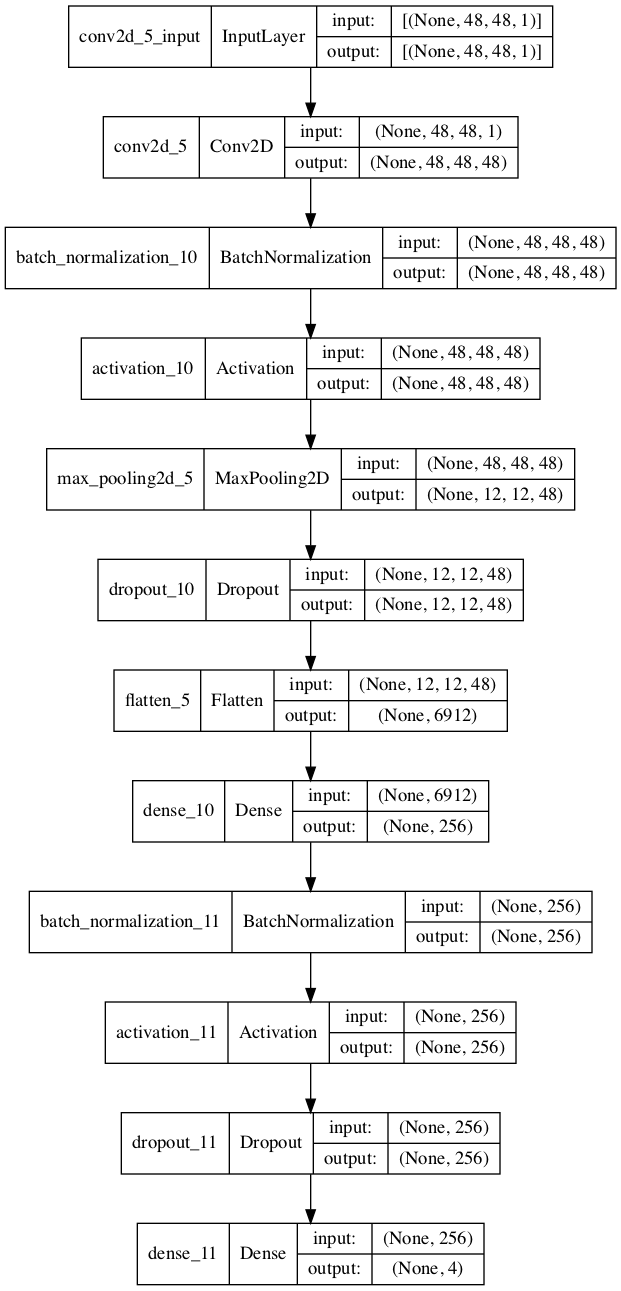

In [57]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'utils/model_plot.png', show_shapes = True, show_layer_names = True)

In [58]:
x_test = np.asarray(images_train)
x_test = np.expand_dims(x_test, axis=0)
x_test = x_test.reshape(x_test.shape[1], x_test.shape[2], x_test.shape[3], x_test.shape[0])
y_test = np.asarray(labels_train)

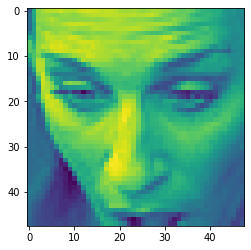

In [59]:
sample_images = x_test[1].reshape(48, 48)
plt.imshow(sample_images)

In [60]:
result = model.predict(x_test)
np.argmax(result[1])

0

In [61]:
check_result = []
result_sum = 0
for result in model.predict(x_test):
    check_result.append(result)
    result_sum += np.argmax(result)
result_sum
check_result

[array([0.8872219 , 0.01233679, 0.00491655, 0.09552476], dtype=float32),
 array([0.7687041 , 0.00381785, 0.00599605, 0.221482  ], dtype=float32),
 array([9.9870098e-01, 4.2912234e-05, 2.2545514e-04, 1.0306400e-03],
       dtype=float32),
 array([0.7746481 , 0.05136615, 0.01543601, 0.15854989], dtype=float32),
 array([0.15079689, 0.01890917, 0.02100881, 0.80928516], dtype=float32),
 array([0.8690833 , 0.01513489, 0.0239639 , 0.09181787], dtype=float32),
 array([0.01207128, 0.00657145, 0.49707842, 0.4842789 ], dtype=float32),
 array([0.5443563 , 0.19371398, 0.24841651, 0.0135132 ], dtype=float32),
 array([0.98834527, 0.00238225, 0.00131621, 0.00795633], dtype=float32),
 array([0.7698459 , 0.1676821 , 0.0242259 , 0.03824609], dtype=float32),
 array([0.9666774 , 0.0038061 , 0.00525304, 0.02426352], dtype=float32),
 array([0.95279694, 0.03929834, 0.00244191, 0.00546291], dtype=float32),
 array([9.8906964e-01, 7.7187584e-04, 9.0075992e-03, 1.1509074e-03],
       dtype=float32),
 array([0.905

In [62]:
model_json = model.to_json()
with open("utils/model.json", "w") as json_file:
    json_file.write(model_json)

In [63]:
model.save('utils/model_weights.h5')